In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 1.- Descarga dataset

In [80]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
Ndata = np.shape(data)[0]
target_ids=[0,1,2] # Índices para etiquetas
print(data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [81]:
iris.target_names, labels.shape

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), (150,))

- Utilizar train_test_split para obener %70 datos de entrenamiento y %30 de prueba

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.3)

print(X_train.shape)
print(Y_train.shape)

(105, 4)
(105,)


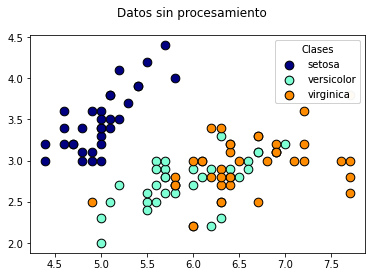

In [83]:
fig, ax = plt.subplots()
colors = ['navy','aquamarine','darkorange']

for clase in range(3):
    X = [X_train[:,0][i] for i in range(105) if Y_train[i] == clase]
    Y = [X_train[:,1][i] for i in range(105) if Y_train[i] == clase]
    plt.scatter(X, Y, s=75, edgecolors='black',c=colors[clase])

fig.suptitle('Datos sin procesamiento')
legend1 = ax.legend(labels=iris.target_names,title="Clases")
ax.add_artist(legend1)

plt.show()

## 2.- Ejercicio numpy

- Obtener media $\mu \in \mathbb{R}^{ 4}$ de cada característica (cada columna) de los datos $X \in \mathbb{R}^{105 \times 4}$ 

In [84]:
np.mean(X_train, axis=0)

array([5.88666667, 3.0447619 , 3.82761905, 1.21904762])

- Centrar los datos  $X - \mu$ 

In [85]:
Xc_train = X_train - np.mean(X_train, axis=0)

print(Xc_train[:5])

[[ 0.91333333 -0.0447619   1.67238095  0.88095238]
 [-0.78666667  0.7552381  -1.92761905 -0.81904762]
 [-0.98666667 -0.5447619   0.67238095  0.48095238]
 [ 0.31333333 -0.8447619   0.67238095  0.28095238]
 [ 1.31333333  0.1552381   2.17238095  0.58095238]]


- Obtener matriz de covarianza $C \in \mathbb{R}^{4 \times 4}$  (no utilizar np.cov)

In [86]:
X_cov = np.zeros((4,4))
for i in range(4):
  for j in range(4):
    X_cov[i][j] = np.dot(Xc_train[:,i],Xc_train[:,j])/(len(Xc_train)-1)
X_cov

array([[ 0.68289744, -0.05978205,  1.26037179,  0.5138141 ],
       [-0.05978205,  0.20595788, -0.36509432, -0.13201465],
       [ 1.26037179, -0.36509432,  3.00682601,  1.25004579],
       [ 0.5138141 , -0.13201465,  1.25004579,  0.56078755]])

In [87]:
X_cov2 = np.matmul(Xc_train.transpose(),Xc_train)/(len(Xc_train)-1)
X_cov2

array([[ 0.68289744, -0.05978205,  1.26037179,  0.5138141 ],
       [-0.05978205,  0.20595788, -0.36509432, -0.13201465],
       [ 1.26037179, -0.36509432,  3.00682601,  1.25004579],
       [ 0.5138141 , -0.13201465,  1.25004579,  0.56078755]])

- Obtener eigenvectores $E \in \mathbb{R}^{4 \times 4}$ de $C$ (usar método de numpy)

In [88]:
eigen_val,eigen_vec = np.linalg.eig(X_cov)

- Proyectar los datos en un nuevo espacio multiplicando por los eigenvectores $E^T X^T$

In [89]:
n_train = np.matmul(eigen_vec.transpose(),X_train.transpose())
n_train.shape

(4, 105)

- Plotear las primeras dos columnas de los datos de entrenamiento para obtener el siguiente resultado:

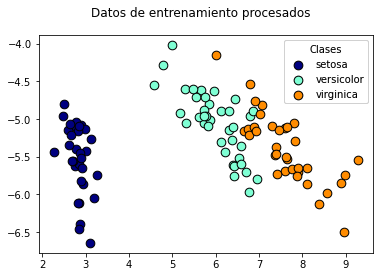

In [93]:
fig, ax = plt.subplots()
colors = ['navy','aquamarine','darkorange']

for clase in range(3):
    X = [n_train[0][i] for i in range(105) if Y_train[i] == clase]
    Y = [n_train[1][i] for i in range(105) if Y_train[i] == clase]
    plt.scatter(X, Y, s=75, edgecolors='black',c=colors[clase])

fig.suptitle('Datos de entrenamiento procesados')
legend1 = ax.legend(labels=iris.target_names,title='Clases')
ax.add_artist(legend1)

plt.show()

- Centrar los datos de prueba usando la media de entrenamiento y pyroyectar usando los eigenvectores de entrenamiento. Plotear las primeras dos columnas para obtener el siguiente resultado:

In [91]:
n_test = np.matmul(eigen_vec.transpose(),X_test.transpose())
n_test.shape

(4, 45)

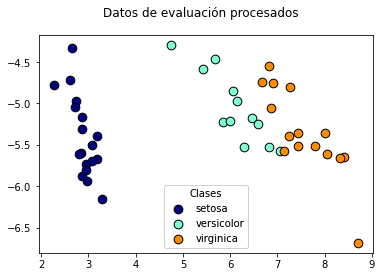

In [94]:
fig, ax = plt.subplots()
colors = ['navy','aquamarine','darkorange']

for clase in range(3):
    X = [n_test[0][i] for i in range(45) if Y_test[i] == clase]
    Y = [n_test[1][i] for i in range(45) if Y_test[i] == clase]
    plt.scatter(X, Y, s=75, edgecolors='black',c=colors[clase])

fig.suptitle('Datos de evaluación procesados')
legend1 = ax.legend(labels=iris.target_names,title='Clases')
ax.add_artist(legend1)

plt.show()